<font color='#00bd42'>**This color for INSIGHTS**</fond>

<font color='#048ad2'>**This color for HEADING**</fond>

<font color='#f5110a'>**This color for CODE**</fond>

<font color='#ecff5f'>**This color for CODE BASED ON INSIGHTS**</fond>

<font color='#fe9fe5'>**This color for PLOTS AND CHARTS**</fond>


In [208]:
import pandas as pd

df = pd.read_csv('loan_prediction.csv')
print(f"Dataset shape: {df.shape}")
df.head(10)

Dataset shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [209]:
# View columns for df

print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


<font color='#00bd42'>**BASED ON INSIGHTS**</fond>

<font color='#00bd42'>**Insights from df.info()**</fond>


        * There are null values in data

<font color='#048ad2'>**Header**</fond>

### <font color='#048ad2'>**Duplicates & Missing Values**</fond>

<font color='#f5110a'>**CODE**</fond>

<font color='#f5110a'>**Duplicates**</fond>

In [211]:
# Get the number of original rows
num_original_rows = len(df)
print(f"Number of Original Rows: {num_original_rows}")

# Identify and display duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"\nNumber of Duplicate Rows: {num_duplicates}")

# Drop duplicate rows and keep the first occurrence
df_no_duplicates = df.drop_duplicates()

# Print the number of remaining rows after removing duplicates
num_remaining_rows = len(df_no_duplicates)
print(f"\nNumber of Remaining Rows after Removing Duplicates: {num_remaining_rows}")


Number of Original Rows: 614

Number of Duplicate Rows: 0

Number of Remaining Rows after Removing Duplicates: 614


<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**from Duplicates**</fond>


        * There are no duplicates rows

<font color='#f5110a'>**CODE**</fond>

<font color='#f5110a'>**missing values and data types**</fond>

In [212]:
# Check missing values and data types, with percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percentage.round(2)
})

print("🔍 Missing Values (Count & Percentage):")
print(missing_info)

print("\n🧬 Data Types:")
print(df.dtypes)


🔍 Missing Values (Count & Percentage):
                   Missing Count  Missing %
Loan_ID                        0       0.00
Gender                        13       2.12
Married                        3       0.49
Dependents                    15       2.44
Education                      0       0.00
Self_Employed                 32       5.21
ApplicantIncome                0       0.00
CoapplicantIncome              0       0.00
LoanAmount                    22       3.58
Loan_Amount_Term              14       2.28
Credit_History                50       8.14
Property_Area                  0       0.00
Loan_Status                    0       0.00

🧬 Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Ar

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**from missing values:**</fond>

        * to avoid errors in modeling and ensures data quality we need to fix these:


        1- missing values (LoanAmount, Credit_History) need to impute or drop them.
        2- Missing categorical values (Gender, Self_Employed) fill with mode (most frequent).
        3- Missing numerical values (LoanAmount) can be filled with the median or mean.

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**from data types:**</fond>

        1- Categorical features: Gender, Married, Education, etc..
           These need to be encoded (Label Encoding or One-Hot Encoding).
        2- Numerical features: ApplicantIncome, LoanAmount, etc.
           Need scaling (e.g. StandardScaler or MinMaxScaler).
        3- Loan_ID: Likely just an identifier — not useful for prediction (drop it).
        4- Loan_Status: This is the target variable (Yes = Approved, No = Rejected)

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**Additional**</fond>

        1- Dependants has values with characters like '+'

<font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**Drop, Fill missing**</fond>

In [213]:
# Drop 'Loan_ID'
df = df.drop('Loan_ID', axis=1)

# Fill missing categorical values with mode (safe assignment)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


<font color='#f5110a'>**CODE**</fond>

<font color='#f5110a'>**New Check on missing values**</fond>

In [214]:
#Check for missing values

missing_values = df.isnull().sum()
data_types = df.dtypes

print("Missing Values:")
print(missing_values)


Missing Values:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<font color='#048ad2'>**Header**</fond>

# <font color='#048ad2'>**Visualizations**</fond>

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('charts_and_plots', exist_ok=True)
import warnings
warnings.filterwarnings('ignore')

## <font color='#ffdff7'>**Categorical Feature Distributions**</fond>

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Gender**</fond>

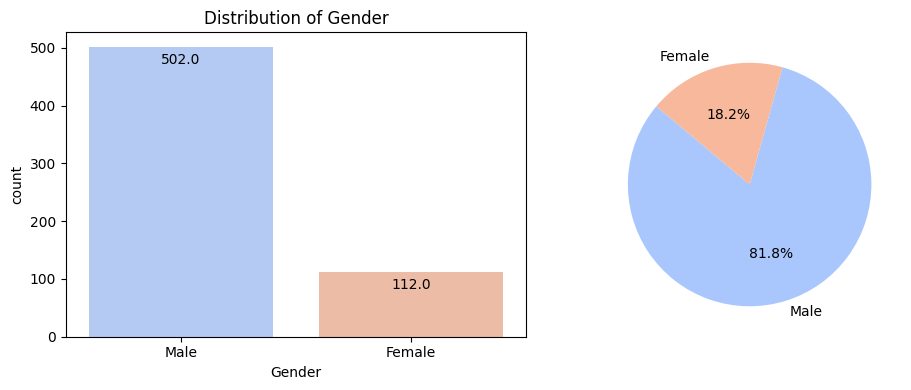

In [216]:
plt.figure(figsize=(10, 4))

# Define palette colors to reuse for pie chart
palette = sns.color_palette("coolwarm", n_colors=df['Gender'].nunique())

# Subplot 1: Countplot
ax1 = plt.subplot(1, 2, 1)
ax = sns.countplot(x='Gender', hue='Gender', data=df, palette=palette, legend=False, ax=ax1)
plt.title('Distribution of Gender')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height() - 10),
                ha='center', va='top')

# Subplot 2: Pie chart
ax2 = plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, colors=palette, autopct='%1.1f%%', startangle=140)
plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_01_distribution_of_gender.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Marital Status**</fond>

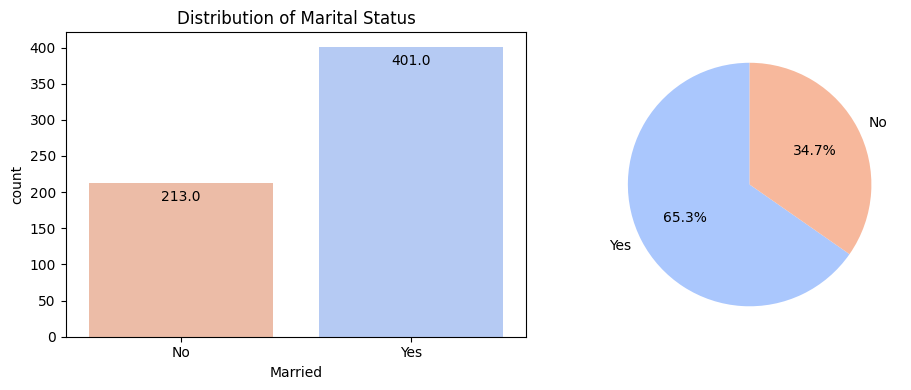

In [217]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Get categories and their counts in order
categories = df['Married'].value_counts().index.tolist()
counts = df['Married'].value_counts().values

# Create a palette with consistent colors for categories
palette = dict(zip(categories, sns.color_palette('coolwarm', n_colors=len(categories))))

# Plot countplot with color palette
ax = sns.countplot(x='Married', data=df, palette=palette, ax=axs[0])
axs[0].set_title('Distribution of Marital Status')
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                    ha='center', va='top')

# Plot pie chart with same colors in same order as categories
axs[1].pie(counts, labels=categories, autopct='%1.1f%%',
           colors=[palette[c] for c in categories], startangle=90)

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_02_distribution_of_marital_status.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Education**</fond>

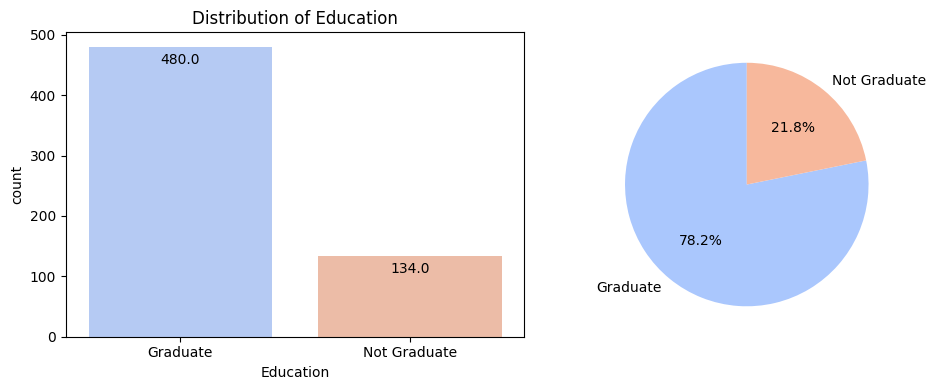

In [218]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = sns.countplot(x='Education', hue='Education', data=df, palette='coolwarm', legend=False, ax=axs[0])
axs[0].set_title('Distribution of Education')
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                    ha='center', va='top')

counts = df['Education'].value_counts()
colors = sns.color_palette('coolwarm', n_colors=len(counts))
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_03_distribution_of_education.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Self Employment**</fond>

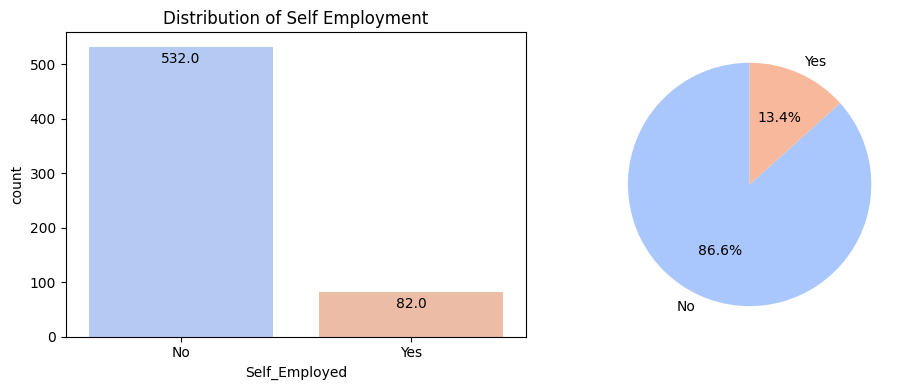

In [219]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = sns.countplot(x='Self_Employed', hue='Self_Employed', data=df, palette='coolwarm', legend=False, ax=axs[0])
axs[0].set_title('Distribution of Self Employment')
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                    ha='center', va='top')

counts = df['Self_Employed'].value_counts()
colors = sns.color_palette('coolwarm', n_colors=len(counts))
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_04_distribution_of_self_employment.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Distribution of Property Area**</fond>

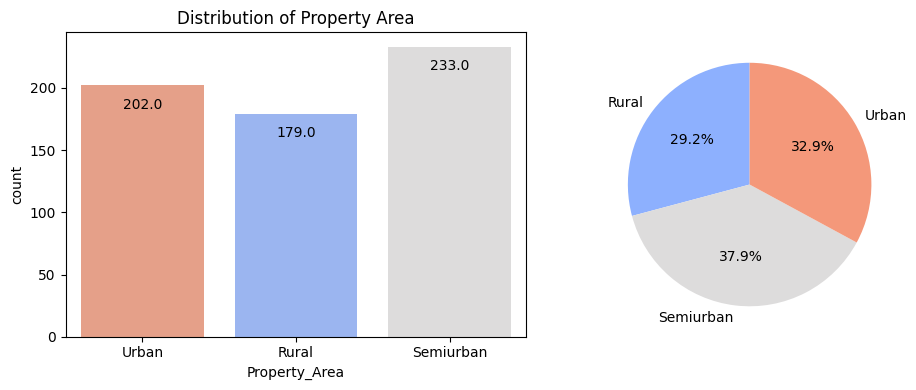

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Get sorted unique categories
categories = sorted(df['Property_Area'].unique())

# Get palette with the same number of colors as categories
palette = sns.color_palette('coolwarm', n_colors=len(categories))

# Create a color map {category: color}
color_map = dict(zip(categories, palette))

# Countplot with hue as Property_Area (to use colors per category)
ax = sns.countplot(x='Property_Area', data=df, palette=color_map, ax=axs[0])
axs[0].set_title('Distribution of Property Area')

# Annotate bars
for p in ax.patches:
    axs[0].annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2, p.get_height() - 10),
                    ha='center', va='top')

# Pie chart with colors in the same order as categories
counts = df['Property_Area'].value_counts().reindex(categories)
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=[color_map[c] for c in counts.index], startangle=90)

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_05_distribution_of_property_area.png'))
plt.show()

## <font color='#ffdff7'>**Numerical Features Analysis**</fond>

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**ApplicantIncome**</fond>

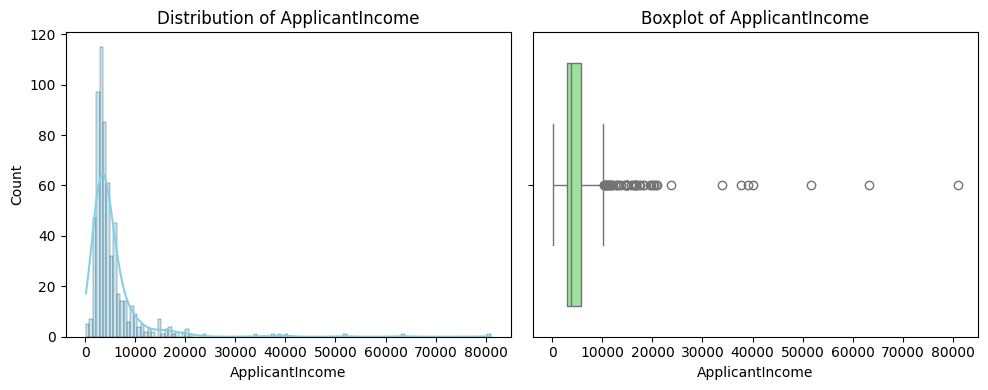

In [221]:
plt.figure(figsize=(10, 4))

# Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Distribution of ApplicantIncome')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ApplicantIncome'], color='lightgreen')
plt.title('Boxplot of ApplicantIncome')

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_06_distribution_of_applicantincome.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**CoapplicantIncome**</fond>

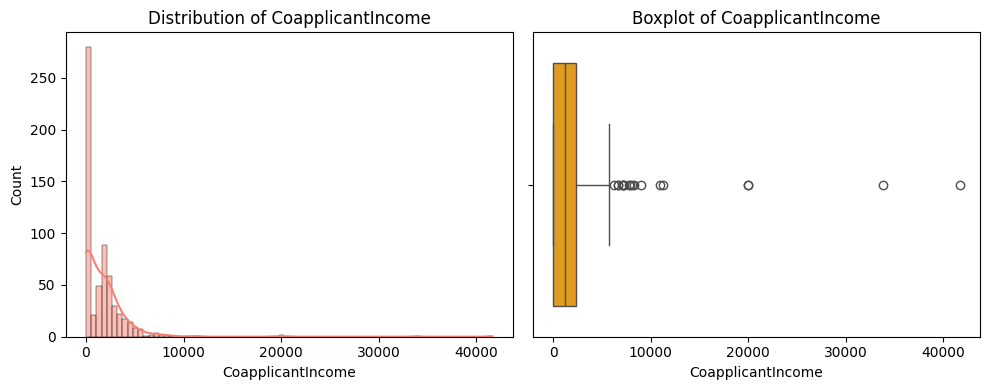

In [222]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['CoapplicantIncome'], kde=True, color='salmon')
plt.title('Distribution of CoapplicantIncome')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['CoapplicantIncome'], color='orange')
plt.title('Boxplot of CoapplicantIncome')

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_07_distribution_of_coapplicantincome.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**LoanAmount**</fond>

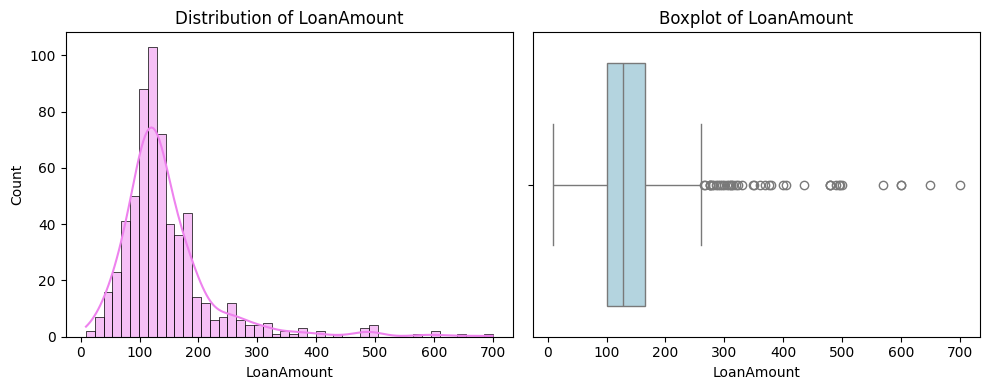

In [223]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['LoanAmount'], kde=True, color='violet')
plt.title('Distribution of LoanAmount')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['LoanAmount'], color='lightblue')
plt.title('Boxplot of LoanAmount')

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_08_distribution_of_loanamount.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Credit_History**</fond>

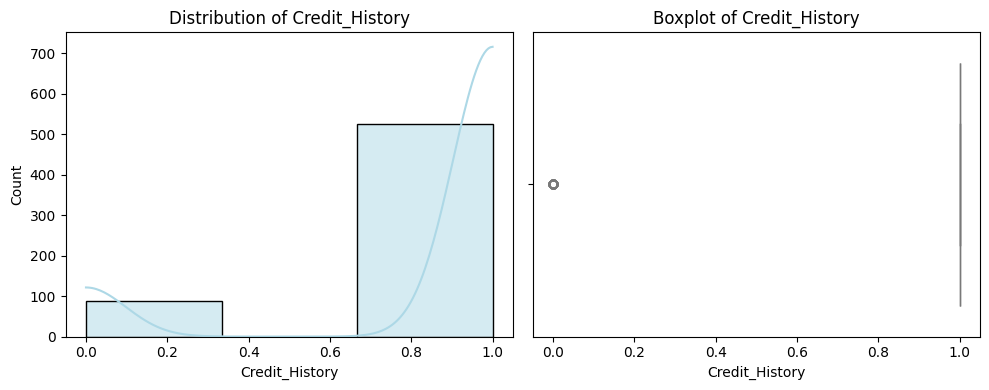

In [224]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Credit_History'], kde=True, bins=3, color='lightblue')
plt.title('Distribution of Credit_History')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Credit_History'], color='palegreen')
plt.title('Boxplot of Credit_History')

plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_09_distribution_of_credit_history.png'))
plt.show()

there are outliers and we need to handle them: ApplicantIncome, CoapplicantIncome, and LoanAmount are right-skewed with outliers.

because of the dataset is small we can not drop these values (for now)

we will apply log transformation as a start and after viewing the result and accuracy we can consider other approaches like removing them with IQR.

## <font color='#ffdff7'>**Correlation Analysis**</fond>

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**HEATMAP: Correlation Matrix of Numerical Features**</fond>

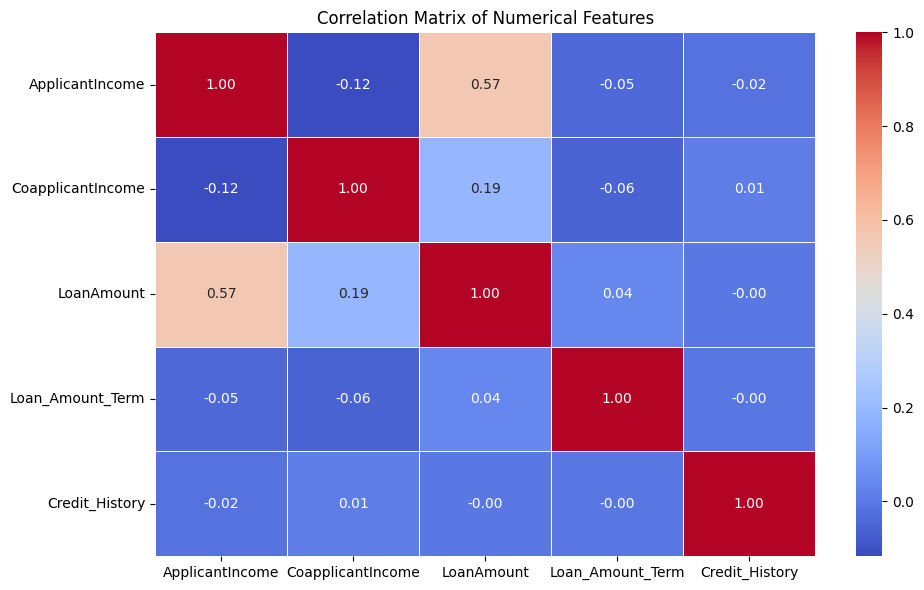

In [225]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_10_correlation_matrix_of_numerical_features.png'))
plt.show()

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**HEATMAP: Correlation Matrix of Numerical Features:**</fond>

The features: ApplicantIncome and LoanAmount show a moderate positive correlation (0.57), suggesting higher income applicants tend to apply for larger loans. CoapplicantIncome and LoanAmount also have a positive correlation (0.19). Other correlations are relatively weak.

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Scatterplot Applicant Income vs Loan Amount**</fond>

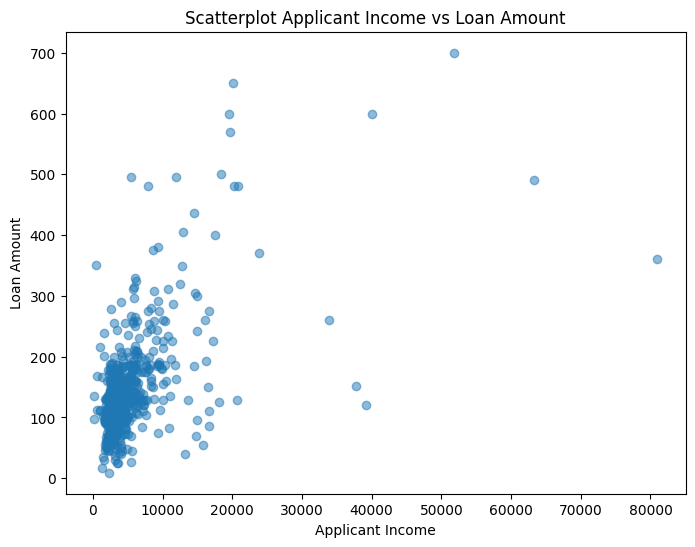

In [226]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha=0.5)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatterplot Applicant Income vs Loan Amount')
plt.savefig(os.path.join('charts_and_plots', 'plot_11_scatterplot_applicant_income_vs_loan_amount.png'))
plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Target Variable Analysis: Class Distribution**</fond>

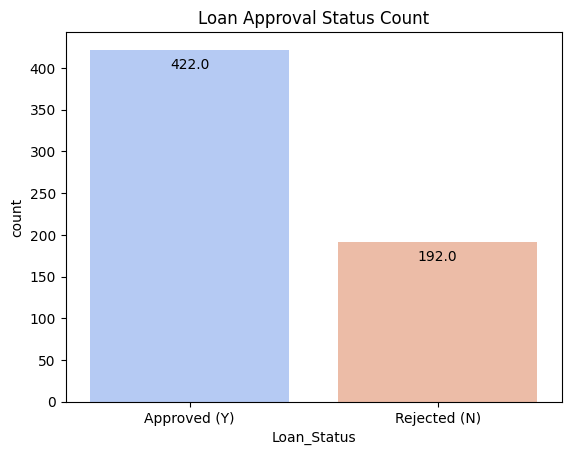

Class Imbalance Ratio (Approved : Rejected) = 422:192 ≈ 2.2:1


In [227]:
ax = sns.countplot(x='Loan_Status', hue='Loan_Status', data=df, palette='coolwarm', legend=False)
plt.title('Loan Approval Status Count')
plt.xticks([0, 1], ['Approved (Y)', 'Rejected (N)'])

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()-10),
                ha='center', va='top')

plt.savefig(os.path.join('charts_and_plots', 'plot_12_loan_approval_status_count.png'))
plt.show()

# Print class imbalance ratio
value_counts = df['Loan_Status'].value_counts()
count_0 = value_counts.get(0, 0)  # Approved
count_1 = value_counts.get(1, 0)  # Rejected
ratio = round(count_0 / count_1, 2) if count_0 != 0 else '∞'
print(f"Class Imbalance Ratio (Approved : Rejected) = {count_0}:{count_1} ≈ {ratio}:1")

The dataset is imbalanced. There are significantly more approved loans (Y) than rejected loans (N), with an imbalance ratio of approximately 2.2:1. This imbalance needs to be considered during modeling.

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Categorical Features vs Target**</fond>



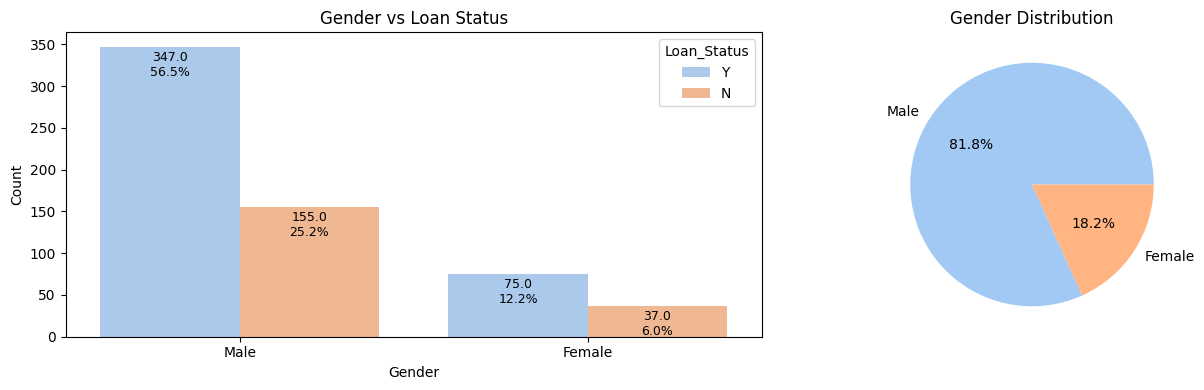

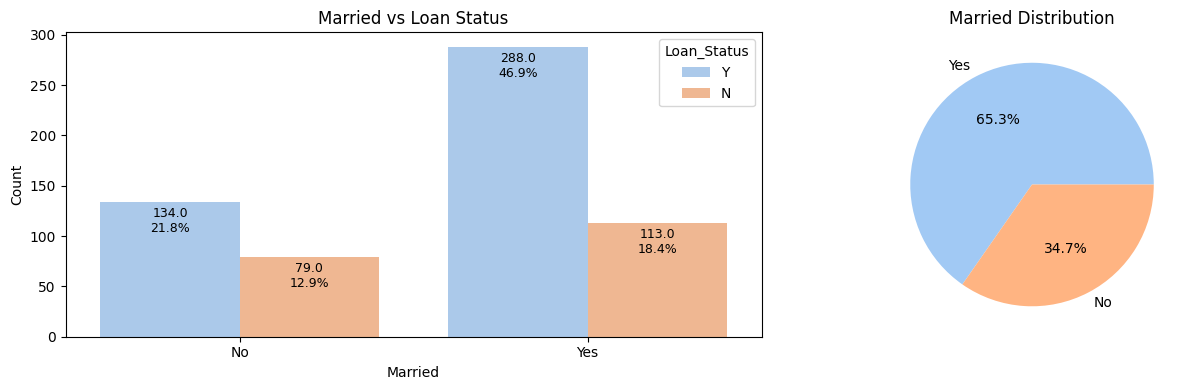

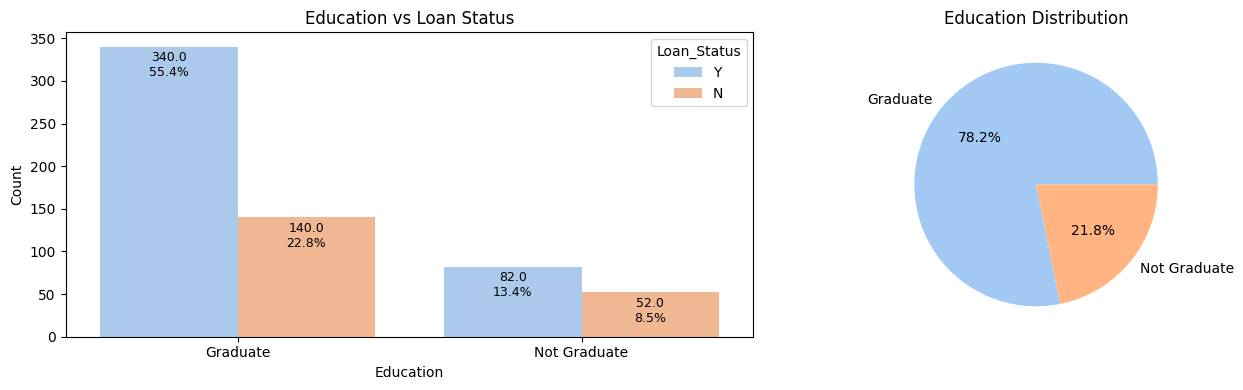

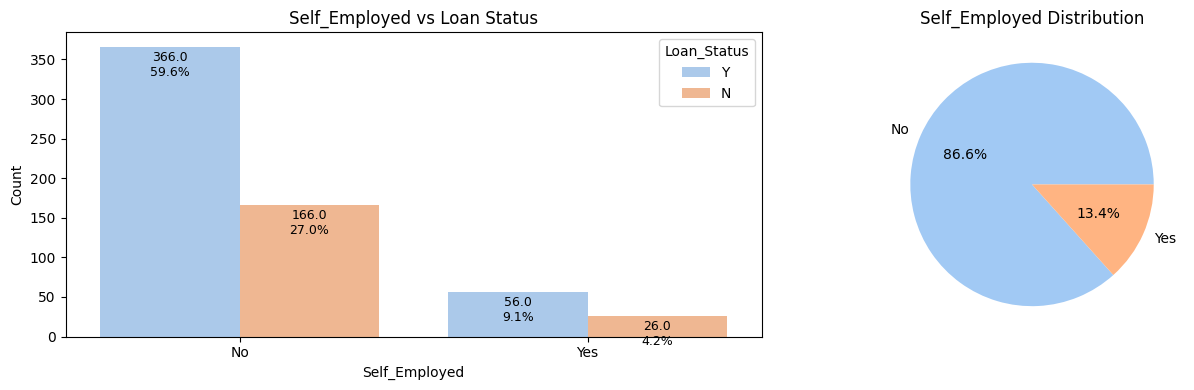

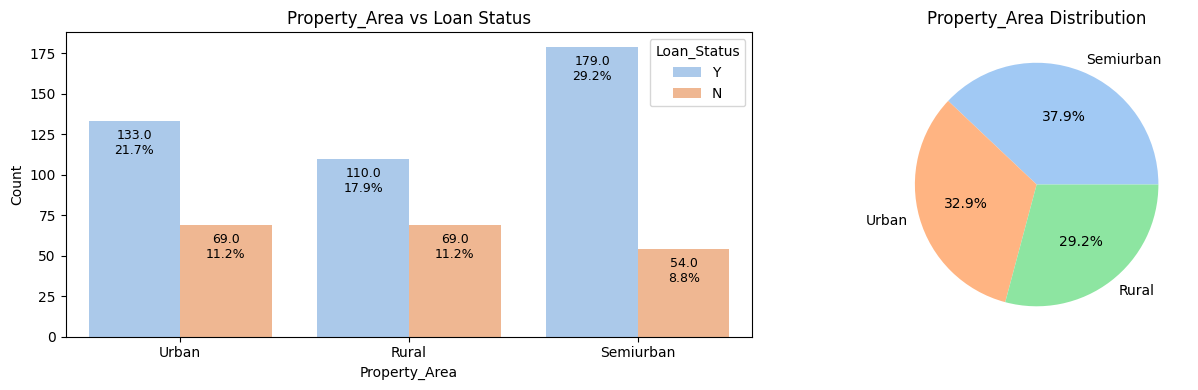

In [228]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for i, col in enumerate(categorical_cols, start=13):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    sns.countplot(x=col, hue='Loan_Status', data=df, palette='pastel', ax=axes[0])
    axes[0].set_title(f'{col} vs Loan Status')
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        h = p.get_height()
        axes[0].annotate(f'{h}\n{100 * h / len(df):.1f}%', (p.get_x() + p.get_width() / 2, h - 5),
                         ha='center', va='top', fontsize=9)

    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], colors=sns.color_palette('pastel'))
    axes[1].set_title(f'{col} Distribution')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.savefig(f'charts_and_plots/plot_{i}_{col}_vs_loan_status.png')
    plt.show()

<font color='#fe9fe5'>**PLOTS AND CHARTS**</fond>

<font color='#ff4fd1'>**Numerical Features vs Target**</fond>



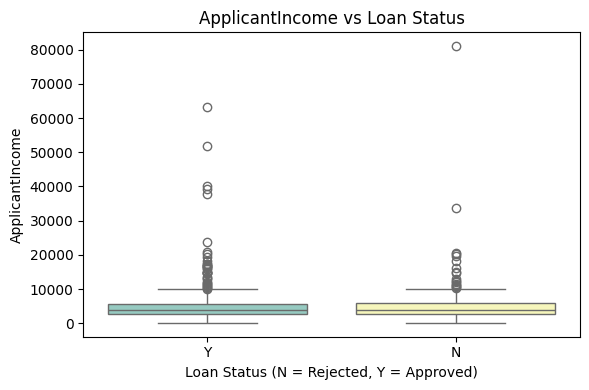

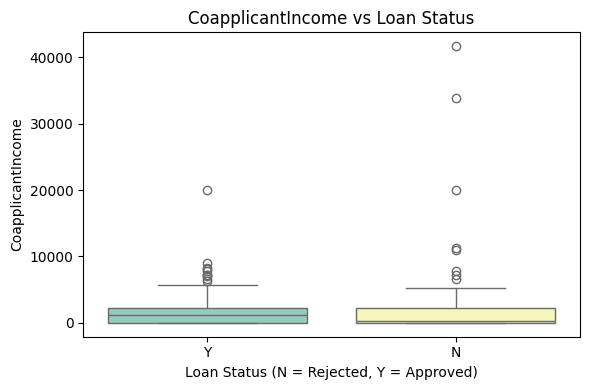

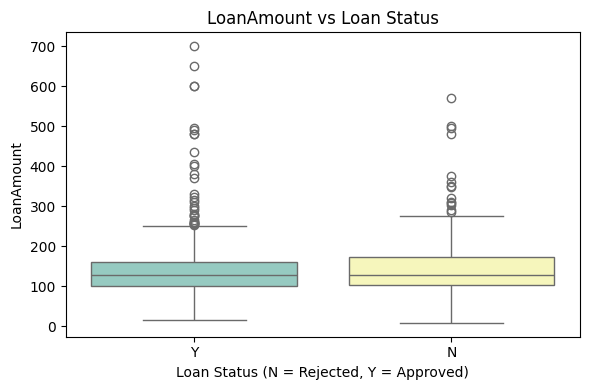

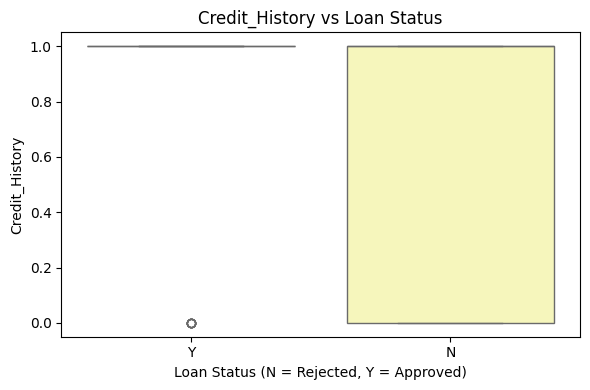

In [229]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

for i, col in enumerate(numerical_cols, start=18):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Loan_Status', y=col, palette='Set3')
    plt.title(f'{col} vs Loan Status')
    plt.xlabel('Loan Status (N = Rejected, Y = Approved)')
    plt.tight_layout()
    plt.savefig(f'charts_and_plots/plot_{i}_{col}_vs_loan_status.png')
    plt.show()

# <font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**The values 3+ will make problems so convert it to 3**</fond>

In [230]:
# Convert '3+' to 3 and cast to int
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

<font color='#ecff5f'>**Extract the Cleaned data before preprocessing**</fond>

In [231]:
#Extract the data as (cleaned_data_loan_prediction.csv)
os.makedirs('datasets', exist_ok=True)
df.to_csv('cleaned_data_loan_prediction.csv', index=False)
print("Cleaned data extracted to 'datasets/cleaned_data_loan_prediction.csv'")

Cleaned data extracted to 'datasets/cleaned_data_loan_prediction.csv'


In [232]:
import numpy as np

# Apply log1p to reduce skewness and handle outliers
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

<font color='#ecff5f'>**BASED ON INSIGHTS**</fond>

<font color='#ecff5f'>**Encode Categorical Variables**</fond>

In [233]:
# Convert 'Y' → 1 and 'N' → 0:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [234]:
# We’ll use One-Hot Encoding to avoid ordering bias:
# One-hot encode remaining categorical features
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education','Self_Employed', 'Property_Area'], drop_first=True)

In [235]:
df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,8.674197,0.000000,4.859812,True,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,8.430327,7.319202,4.859812,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,8.006701,0.000000,4.204693,True,True,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,7.857094,7.765993,4.795791,True,True,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,8.699681,0.000000,4.955827,True,False,False,False,False,True
5,2,5417,4196.0,267.0,360.0,1.0,1,8.597482,8.342125,5.590987,True,True,False,True,False,True
6,0,2333,1516.0,95.0,360.0,1.0,1,7.755339,7.324490,4.564348,True,True,True,False,False,True
7,3,3036,2504.0,158.0,360.0,0.0,0,8.018625,7.826044,5.068904,True,True,False,False,True,False
8,2,4006,1526.0,168.0,360.0,1.0,1,8.295798,7.331060,5.129899,True,True,False,False,False,True
9,1,12841,10968.0,349.0,360.0,1.0,0,9.460476,9.302828,5.857933,True,True,False,False,True,False


**Feature Importance Analysis**

We will use the encoded + cleaned dataset, and drop the original income/loan columns in favor of the log transformed ones

In [236]:
# Drop original columns and define features (X) and target (y)
df_model = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)

X = df_model.drop('Loan_Status', axis=1)
y = df_model['Loan_Status']

**Train RandomForestClassifier model and Plot Feature Importances**

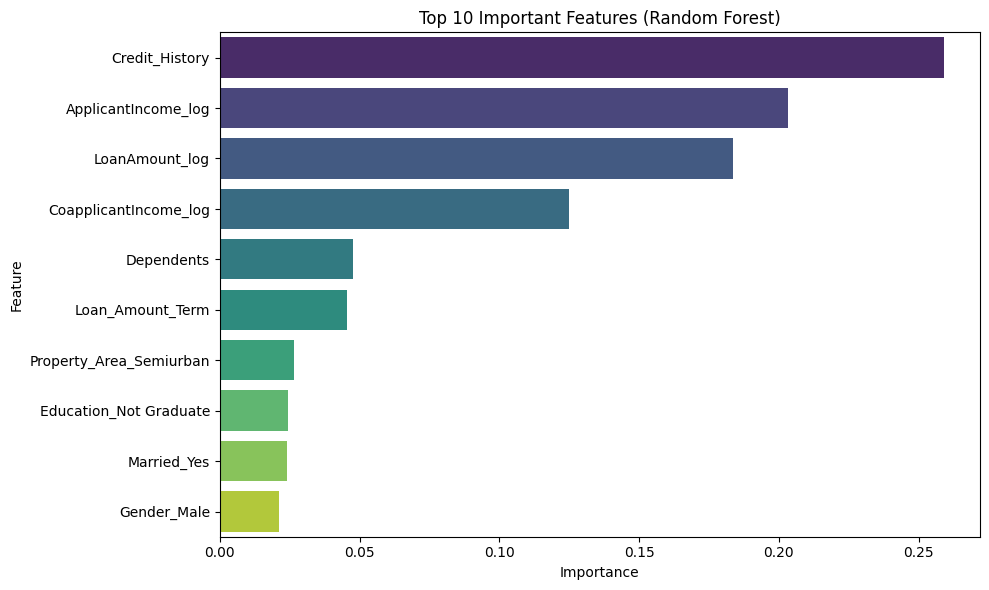

In [237]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract and sort feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_22_top_10_important_features_random_forest.png'))
plt.show()

<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**Feature Importances:**</fond>

Credit_History, LoanAmount_log and incomes are most important.

# <font color='#048ad2'>**MODELING**</fond>

## <font color='#048ad2'>**Header: Test(PYCARET)**</fond>
<font color='#048ad2'>**Pycaret Library can automates data preprocessing, model training, comparison, and evaluation, letting us quickly find the best classification model without writing complex code for each step.**</fond>

In [238]:
'''
!pip install pycaret
'''

'\n!pip install pycaret\n'

**On unprocessed Data (pycaret library)**

In [239]:
'''
import pandas as pd
from pycaret.classification import *

# Load the dataset
df_model1 = pd.read_csv('/content/loan_prediction.csv')

classification_setup = setup(data = df_model1,
                            target = 'Loan_Status',
                            session_id = 123,
                            remove_outliers = False, # Set to True if you want PyCaret to handle outliers
                            normalize = False, # Set to True for normalization
                            transformation = False, # Set to True for transformation
                            fix_imbalance = False, # Set to True to handle imbalance (SMOTE)
                            preprocess = False, # Use PyCaret's preprocessing
                            html=True,              # Hides setup wizard and prompts
                            verbose=False             # Suppresses most of the logs
                            )

# Compare models
best_model = compare_models()
'''

"\nimport pandas as pd\nfrom pycaret.classification import *\n\n# Load the dataset\ndf_model1 = pd.read_csv('/content/loan_prediction.csv')\n\nclassification_setup = setup(data = df_model1,\n                            target = 'Loan_Status',\n                            session_id = 123,\n                            remove_outliers = False, # Set to True if you want PyCaret to handle outliers\n                            normalize = False, # Set to True for normalization\n                            transformation = False, # Set to True for transformation\n                            fix_imbalance = False, # Set to True to handle imbalance (SMOTE)\n                            preprocess = False, # Use PyCaret's preprocessing\n                            html=True,              # Hides setup wizard and prompts\n                            verbose=False             # Suppresses most of the logs\n                            )\n\n# Compare models\nbest_model = compare_models()\n"

**Not much models because data is not processed**

**On OUR preprocessed Data (pycaret library)**

In [240]:
'''
import pandas as pd

df_model2 = pd.read_csv('/content/loan_prediction.csv')


# Drop 'Loan_ID'
df_model2 = df_model2.drop('Loan_ID', axis=1)

# Fill missing categorical values with mode (safe assignment)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df_model2[col] = df_model2[col].fillna(df_model2[col].mode()[0])

# Fill missing numerical values
df_model2['LoanAmount'] = df_model2['LoanAmount'].fillna(df_model2['LoanAmount'].median())
df_model2['Loan_Amount_Term'] = df_model2['Loan_Amount_Term'].fillna(df_model2['Loan_Amount_Term'].mode()[0])
df_model2['Credit_History'] = df_model2['Credit_History'].fillna(df_model2['Credit_History'].mode()[0])

# Convert '3+' to 3 and cast to int
df_model2['Dependents'] = df_model2['Dependents'].replace('3+', 3).astype(int)

import numpy as np

# Apply log1p to reduce skewness and handle outliers
df_model2['ApplicantIncome_log'] = np.log1p(df_model2['ApplicantIncome'])
df_model2['CoapplicantIncome_log'] = np.log1p(df_model2['CoapplicantIncome'])
df_model2['LoanAmount_log'] = np.log1p(df_model2['LoanAmount'])


# Convert 'Y' → 1 and 'N' → 0:
df_model2['Loan_Status'] = df_model2['Loan_Status'].map({'Y': 1, 'N': 0})

# We’ll use One-Hot Encoding to avoid ordering bias:
# One-hot encode remaining categorical features
df_model2 = pd.get_dummies(df_model2, columns=['Gender', 'Married', 'Education','Self_Employed', 'Property_Area'], drop_first=True)



from pycaret.classification import setup, compare_models

# Setup PyCaret
# Ensure that the target variable 'Loan_Status' is treated as a categorical variable (for classification)
# We will use the preprocessed DataFrame 'df_model2'
clf1 = setup(data = df_model2, target = 'Loan_Status', session_id = 123,
             preprocess=False, # If Data is already preprocessed
             html=True,              # Hides setup wizard and prompts
             verbose=False             # Suppresses most of the logs
             )

# Compare top 10 models based on 'Accuracy' (default metric for classification)
best_models = compare_models(n_select=10)
'''

"\nimport pandas as pd\n\ndf_model2 = pd.read_csv('/content/loan_prediction.csv')\n\n\n# Drop 'Loan_ID'\ndf_model2 = df_model2.drop('Loan_ID', axis=1)\n\n# Fill missing categorical values with mode (safe assignment)\nfor col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:\n    df_model2[col] = df_model2[col].fillna(df_model2[col].mode()[0])\n\n# Fill missing numerical values\ndf_model2['LoanAmount'] = df_model2['LoanAmount'].fillna(df_model2['LoanAmount'].median())\ndf_model2['Loan_Amount_Term'] = df_model2['Loan_Amount_Term'].fillna(df_model2['Loan_Amount_Term'].mode()[0])\ndf_model2['Credit_History'] = df_model2['Credit_History'].fillna(df_model2['Credit_History'].mode()[0])\n\n# Convert '3+' to 3 and cast to int\ndf_model2['Dependents'] = df_model2['Dependents'].replace('3+', 3).astype(int)\n\nimport numpy as np\n\n# Apply log1p to reduce skewness and handle outliers\ndf_model2['ApplicantIncome_log'] = np.log1p(df_model2['ApplicantIncome'])\ndf_model2['CoapplicantIncome_log

**On pycaret preprocessed Data (pycaret library)**

In [241]:
'''
import pandas as pd
from pycaret.classification import *

# Load the dataset
df_model3 = pd.read_csv('/content/loan_prediction.csv')

classification_setup = setup(data = df_model3,
                            target = 'Loan_Status',
                            session_id = 123,
                            remove_outliers = True, # Set to True if you want PyCaret to handle outliers
                            normalize = False, # Set to True for normalization
                            transformation = False, # Set to True for transformation
                            fix_imbalance = True, # Set to True to handle imbalance (SMOTE)
                            preprocess = True, # Use PyCaret's preprocessing
                            html=True,              # Hides setup wizard and prompts
                            verbose=False             # Suppresses most of the logs
                            )

# Compare models
best_model = compare_models()
'''

"\nimport pandas as pd\nfrom pycaret.classification import *\n\n# Load the dataset\ndf_model3 = pd.read_csv('/content/loan_prediction.csv')\n\nclassification_setup = setup(data = df_model3,\n                            target = 'Loan_Status',\n                            session_id = 123,\n                            remove_outliers = True, # Set to True if you want PyCaret to handle outliers\n                            normalize = False, # Set to True for normalization\n                            transformation = False, # Set to True for transformation\n                            fix_imbalance = True, # Set to True to handle imbalance (SMOTE)\n                            preprocess = True, # Use PyCaret's preprocessing\n                            html=True,              # Hides setup wizard and prompts\n                            verbose=False             # Suppresses most of the logs\n                            )\n\n# Compare models\nbest_model = compare_models()\n"

**Summary of Selected Models:**

We selected the following models for further processing:

---



* Logistic Regression
* Random Forest
* KNN
* Decision Tree
* Neural Network

## <font color='#048ad2'>**Building Models**</fond>

Define Models

Train and Evaluate Baseline For Defined Models

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning)
# Preprocessing setup
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),
])

# Model selection
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model evaluation
results = []
for name, model in models.items():
    pipe = Pipeline([('prep', preprocessor), ('clf', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    y_proba = None
    try:
        y_proba = pipe.predict_proba(X_test)[:, 1]
    except AttributeError:
        try:
            scores = pipe.decision_function(X_test)
            y_proba = (scores - scores.min()) / (scores.max() - scores.min())
        except AttributeError:
            pass

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })

# Results display
results_df = pd.DataFrame(results).sort_values('F1', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.853659,0.831683,0.988235,0.903226,0.805573
4,Neural Network,0.845528,0.843750,0.952941,0.895028,0.806192
1,Random Forest,0.821138,0.838710,0.917647,0.876404,0.810217
2,KNN,0.796748,0.833333,0.882353,0.857143,0.780031
3,Decision Tree,0.756098,0.823529,0.823529,0.823529,0.714396


In [243]:
import os

# Create the directory if it doesn't exist
output_dir = 'results'
os.makedirs(output_dir, exist_ok=True)

# Define the file path
file_path = os.path.join(output_dir, 'baseline_models_comparison.csv')

# Save the dataframe to a CSV file
results_df.to_csv(file_path, index=True)

print(f"DataFrame saved to {file_path}")

DataFrame saved to results/baseline_models_comparison.csv


<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**Best Model:**</fond>

As a start, the best model for baseline data (baseline data:leaving the imbalanced data as it is) and according to the F1 Score is this:


Model: Logistic Regression

*   Accuracy: 0.853659
*   Precision: 0.831683
*   Recall: 0.988235
*   F1 Score: 0.903226
*   AUC: 0.805573



<font color='#f5110a'>**Plot Evaluation Figures for Logistic Regression**</fond>

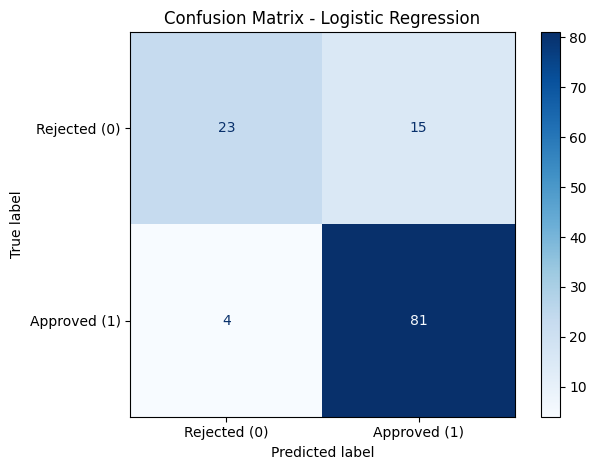

In [244]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict again to get confusion matrix
y_pred = pipe.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected (0)', 'Approved (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_23_confusion_matrix_logistic_regression.png'))
plt.show()

<font color='#f5110a'>**ROC Curve**</fond>



*   An ROC (Receiver Operating Characteristic) curve is a graph that visualizes the performance of a binary classifier (a model that predicts one of two outcomes) at different classification thresholds. It plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity). The curve essentially shows how well a model can distinguish between the two classes by varying the threshold at which a prediction is made.


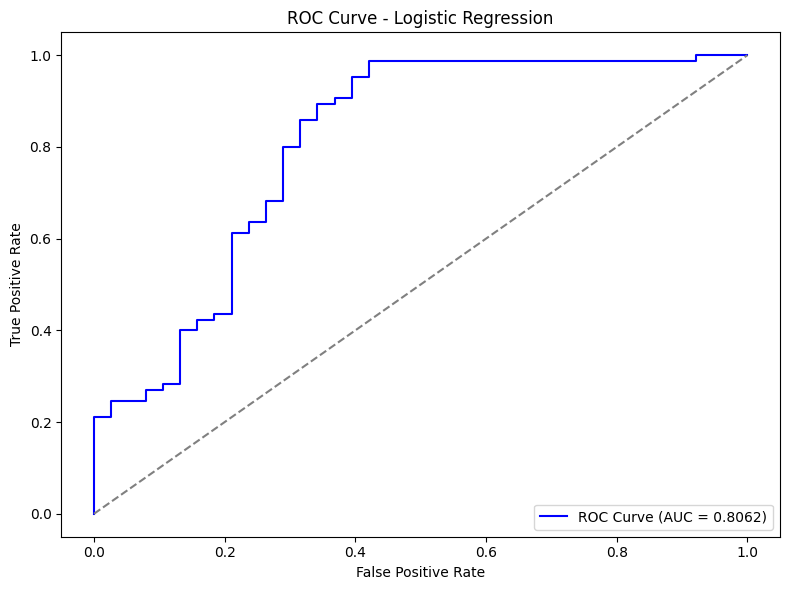

In [245]:
from sklearn.metrics import roc_curve, auc

y_proba = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_24_roc_curve__logistic_regression.png'))
plt.show()



---



---



---



---



---



Train and Evaluate class_weight For Defined Models (Compare with Baseline method results)

---

<font color='#00bd42'>**Why Use Class Weights?**</fond>

---


Because the dataset is imbalanced (~2:2 approval vs. rejection), class weights:

Penalize the model more for misclassifying the minority class.

Improve recall and F1-score for the underrepresented class.

---

<font color='#00bd42'>**Not all models support class_weight. We'll apply this to:**</fond>

---

*   Logistic Regression
*   Random Forest
*   Decision Tree

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Models that support class_weight
weighted_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42)
}
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Store results
cw_results = []

for name, model in weighted_models.items():
    print(f"\nTraining {name} with class weights...")

    # Pipeline with class-weighted model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate
    result = {
        'Model': name + " (Weighted)",
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }

    cw_results.append(result)

# Combine with previous results for comparison
comparison_df = pd.concat([
    results_df,
    pd.DataFrame(cw_results)
], ignore_index=True)

comparison_df.sort_values(by='F1', ascending=False)


Training Logistic Regression with class weights...

Training Random Forest with class weights...

Training Decision Tree with class weights...


,Model,Accuracy,Precision,Recall,F1,AUC
5,Logistic Regression (Weighted),0.869919,0.848485,0.988235,0.913043,0.807121
0,Logistic Regression,0.853659,0.831683,0.988235,0.903226,0.805573
1,Neural Network,0.845528,0.843750,0.952941,0.895028,0.806192
2,Random Forest,0.821138,0.838710,0.917647,0.876404,0.810217
6,Random Forest (Weighted),0.821138,0.838710,0.917647,0.876404,0.804644
3,KNN,0.796748,0.833333,0.882353,0.857143,0.780031
4,Decision Tree,0.756098,0.823529,0.823529,0.823529,0.714396
7,Decision Tree (Weighted),0.739837,0.844156,0.764706,0.802469,0.724458


<font color='#00bd42'>**INSIGHTS**</fond>

<font color='#00bd42'>**Best Model:**</fond>

The best model for Class Weights data (Class Weights data:Balance the data,Penalize the model more for misclassifying the minority class, Improve recall and F1-score for the underrepresented class.) and according to the F1 Score is this:


Model: Logistic Regression (Weighted)

*   Accuracy: 0.869919
*   Precision: 0.848485
*   Recall: 0.988235
*   F1 Score: 0.913043
*   AUC: 0.807121


**Plot Evaluation Figures for Logistic Regression (Weighted)**

Retrain + Evaluate Logistic Regression (Weighted)

In [247]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Rebuild pipeline
best_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# Cross-validation (20-fold stratified)
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_pipeline, X, y, cv=cv, scoring='f1')

# Train on full dataset
best_pipeline.fit(X, y)

# Report results
print("Cross-validation F1 scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())

Cross-validation F1 scores: [0.89795918 0.85714286 0.91304348 0.85714286 0.85106383 0.91304348
 0.91304348 0.80851064 0.85714286 0.86956522 0.85714286 0.93023256
 0.88888889 0.81632653 0.85106383 0.89361702 0.89361702 0.86956522
 0.90909091 0.84444444]
Mean F1 Score: 0.8745823576705835


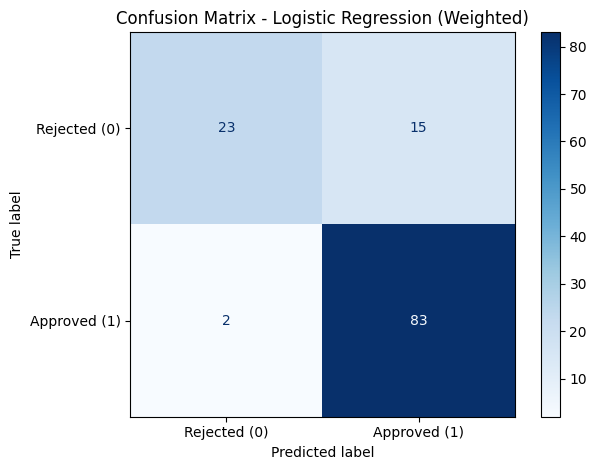

In [248]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict again to get confusion matrix
y_pred = best_pipeline.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected (0)', 'Approved (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Weighted)')
plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_25_confusion_matrix_logistic_regression_weighted.png'))
plt.show()

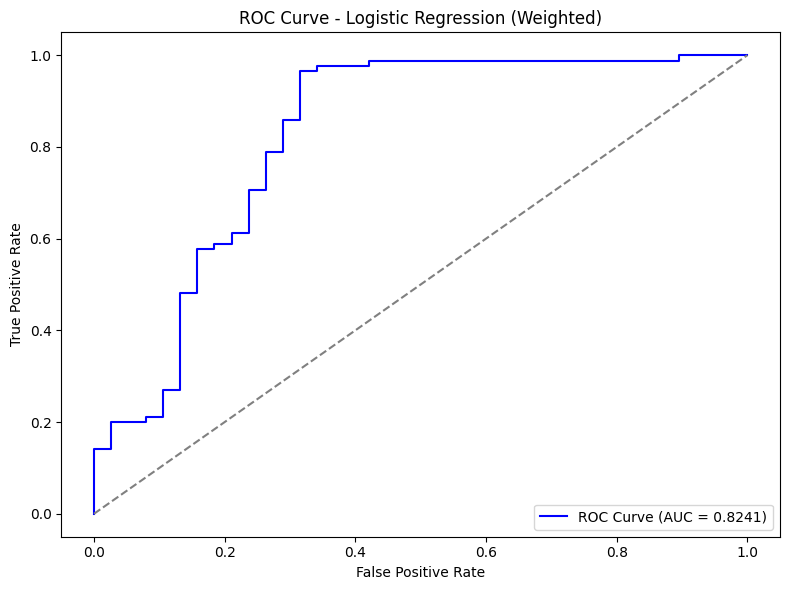

In [249]:
from sklearn.metrics import roc_curve, auc

y_proba = best_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Weighted)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(os.path.join('charts_and_plots', 'plot_26_roc_curve__logistic_regression_weighted.png'))
plt.show()

<font color='#f5110a'>**import joblib and extract the model as .pkl extension**</fond>

In [250]:
import joblib

# Create the 'models' directory if it doesn't exist
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Define the filename
filename = 'logistic_regression_weighted.pkl'
filepath = os.path.join(models_dir, filename)

# Save the best_pipeline model
joblib.dump(best_pipeline, filepath)

print(f"Model saved to {filepath}")

Model saved to models/logistic_regression_weighted.pkl


<font color='#f5110a'>**Testing the model**</fond>

In [251]:
import os
import joblib
import pandas as pd
import numpy as np

# Assuming models_dir is defined somewhere (directory where your model is stored)
models_dir = "/content/models"  # Replace with your actual models directory path

def predict_loan_approval(sample_data):
    # Load the model
    with open(os.path.join(models_dir, "logistic_regression_weighted.pkl"), "rb") as f:
        model = joblib.load(f)

    # Apply log transformation to ApplicantIncome
    sample_data['ApplicantIncome_log'] = np.log1p(sample_data['ApplicantIncome'])
    sample_data['CoapplicantIncome_log'] = np.log1p(sample_data['CoapplicantIncome'])
    sample_data['LoanAmount_log'] = np.log1p(sample_data['LoanAmount'])

    # Drop the original column if the model expects only the transformed one
    sample_data = sample_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)
    # Make predictions
    predictions = model.predict(sample_data)
    probabilities = model.predict_proba(sample_data)[:, 1]

    return predictions, probabilities

# Create sample data that matches the features your model was trained on
sample_data = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['No'],
    'Dependents': ['0'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [4500],  # Original value
    'CoapplicantIncome': [400],
    'LoanAmount': [40],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': ['Urban']
})

# Make predictions
predictions, probabilities = predict_loan_approval(sample_data)

# Create results DataFrame
results = pd.DataFrame({
    "Predicted_Status": predictions,
    "Approval_Probability": probabilities
})

# Display results
print(results)

   Predicted_Status  Approval_Probability
0                 1              0.771875


# TEST
Train-Test Split

Preprocessing Pipelines

Train & Evaluate Baseline Models

We'll:

  * Build pipelines (preprocessing + model)

  * Train on X_train

  * Predict on X_test

  * Measure performance: Accuracy, Precision, Recall, F1, AUC

Define Models

Train & Evaluate Each Model

# TEST

In [252]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np

# Define the model with custom class weights and optimal hyperparameters
best_model = LogisticRegression(
    max_iter=1000,
    class_weight={0: 2.2, 1: 1},  # Adjust weights based on business needs
    solver='liblinear',          # Suitable for small datasets and L1/L2 regularization
    random_state=42              # Ensure reproducibility
)

# Rebuild the pipeline with preprocessing and classifier
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Ensure 'preprocessor' is defined earlier
    ('classifier', best_model)
])

# Define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define multiple scoring metrics for cross-validation
scoring = {
    'f1': make_scorer(f1_score, pos_label=1),  # F1 for class 1 (Approved)
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1_rejected': make_scorer(f1_score, pos_label=0),  # F1 for class 0 (Rejected)
}

# Perform cross-validation with multiple metrics
cv_results = cross_validate(
    best_pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False  # Set to True if you want to check for overfitting
)

# Train the final model on the full dataset
best_pipeline.fit(X, y)

# Print cross-validation results
print("Cross-validation results:")
print(f"F1 (Approved): Mean = {np.mean(cv_results['test_f1']):.3f}, Std = {np.std(cv_results['test_f1']):.3f}")
print(f"Precision (Approved): Mean = {np.mean(cv_results['test_precision']):.3f}, Std = {np.std(cv_results['test_precision']):.3f}")
print(f"Recall (Approved): Mean = {np.mean(cv_results['test_recall']):.3f}, Std = {np.std(cv_results['test_recall']):.3f}")
print(f"F1 (Rejected): Mean = {np.mean(cv_results['test_f1_rejected']):.3f}, Std = {np.std(cv_results['test_f1_rejected']):.3f}")

# Optional: Generate predictions and confusion matrix for the full dataset
y_pred = best_pipeline.predict(X)
print("\nConfusion Matrix (Full Dataset):")
print(confusion_matrix(y, y_pred))

Cross-validation results:
F1 (Approved): Mean = 0.867, Std = 0.017
Precision (Approved): Mean = 0.794, Std = 0.024
Recall (Approved): Mean = 0.955, Std = 0.023
F1 (Rejected): Mean = 0.582, Std = 0.064

Confusion Matrix (Full Dataset):
[[ 88 104]
 [ 13 409]]


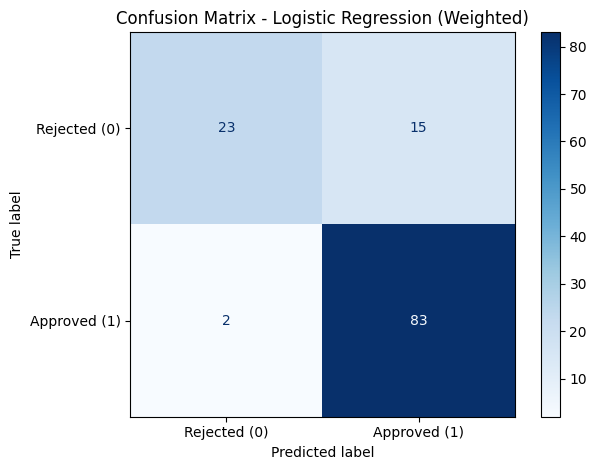

In [253]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict again to get confusion matrix
y_pred = best_pipeline.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected (0)', 'Approved (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Weighted)')
plt.tight_layout()
plt.show()


# TEST

In [254]:
from sklearn.model_selection import train_test_split

# Split data (or use cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
best_pipeline.fit(X_train, y_train)

# Get probabilities for class 0 (Rejected)
y_probs = best_pipeline.predict_proba(X_test)[:, 0]  # Probabilities of class 0

In [255]:
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs, pos_label=0)  # Focus on Rejected (0)

# Option 1: Maximize F1 for Rejected
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_threshold_f1 = thresholds[np.argmax(f1_scores)]

# Option 2: Youden’s J (maximize recall + specificity)
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=0)
youden_j = tpr - fpr
best_threshold_youden = thresholds[np.argmax(youden_j)]

print(f"Best threshold (F1): {best_threshold_f1:.2f}")
print(f"Best threshold (Youden’s J): {best_threshold_youden:.2f}")

Best threshold (F1): 0.47
Best threshold (Youden’s J): 0.94


In [256]:
# Choose a threshold (e.g., 0.3 instead of 0.5)
custom_threshold = 0.3
y_pred_custom = (y_probs > custom_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom, target_names=["Rejected", "Approved"]))

              precision    recall  f1-score   support

    Rejected       0.26      0.21      0.23        43
    Approved       0.62      0.69      0.65        80

    accuracy                           0.52       123
   macro avg       0.44      0.45      0.44       123
weighted avg       0.49      0.52      0.51       123



In [257]:
# After training best_pipeline
y_probs = best_pipeline.predict_proba(X_test)[:, 0]

# Test thresholds between 0.1 and 0.5
thresholds_to_test = np.linspace(0.1, 0.5, 20)
results = []

for thresh in thresholds_to_test:
    y_pred = (y_probs > thresh).astype(int)
    recall_rejected = recall_score(y_test, y_pred, pos_label=0)
    precision_rejected = precision_score(y_test, y_pred, pos_label=0)
    results.append((thresh, recall_rejected, precision_rejected))

# Convert to DataFrame for analysis
import pandas as pd
df_results = pd.DataFrame(results, columns=["Threshold", "Recall (Rejected)", "Precision (Rejected)"])
print(df_results.sort_values("Recall (Rejected)", ascending=False))

    Threshold  Recall (Rejected)  Precision (Rejected)
19   0.500000           0.581395              0.242718
18   0.478947           0.558140              0.242424
17   0.457895           0.511628              0.247191
16   0.436842           0.488372              0.244186
15   0.415789           0.465116              0.253165
13   0.373684           0.465116              0.281690
14   0.394737           0.465116              0.266667
12   0.352632           0.372093              0.258065
11   0.331579           0.325581              0.245614
9    0.289474           0.209302              0.310345
10   0.310526           0.209302              0.209302
8    0.268421           0.093023              0.222222
4    0.184211           0.023256              0.333333
5    0.205263           0.023256              0.200000
6    0.226316           0.023256              0.125000
7    0.247368           0.023256              0.083333
3    0.163158           0.000000              0.000000
2    0.142

In [258]:
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (make_scorer, f1_score, precision_score,
                            recall_score, confusion_matrix, precision_recall_curve)
import numpy as np

# --- 1. Define Model and Pipeline ---
best_model = LogisticRegression(
    max_iter=1000,
    class_weight={0: 2.2, 1: 1},
    solver='liblinear',
    random_state=42
)

best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# --- 2. Threshold Tuning Using Holdout Set ---
# Split data into train (80%) and validation (20%) for threshold tuning
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                stratify=y, random_state=42)

# Fit on training data
best_pipeline.fit(X_train, y_train)

# Get probabilities for class 0 (Rejected) on validation set
y_probs_val = best_pipeline.predict_proba(X_val)[:, 0]

# Find optimal threshold (maximizing F1 for Rejected)
precision, recall, thresholds = precision_recall_curve(y_val, y_probs_val, pos_label=0)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nOptimal Threshold (Validation Set): {best_threshold:.3f}")

# --- 3. Cross-Validation with Threshold Adjustment ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def custom_predict(X, pipeline, threshold):
    """Predict using custom threshold on class 0 probabilities"""
    probs = pipeline.predict_proba(X)[:, 0]
    return (probs > threshold).astype(int)

# Custom scorer for cross-validation (using the tuned threshold)
scoring = {
    'f1_approved': make_scorer(f1_score, pos_label=1),
    'recall_rejected': make_scorer(recall_score, pos_label=0),
    'precision_rejected': make_scorer(precision_score, pos_label=0),
}

cv_results = []
for train_idx, test_idx in cv.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Fit on fold
    best_pipeline.fit(X_train_cv, y_train_cv)

    # Predict with tuned threshold
    y_pred_cv = custom_predict(X_test_cv, best_pipeline, best_threshold)

    # Store metrics
    cv_results.append({
        'f1_approved': f1_score(y_test_cv, y_pred_cv, pos_label=1),
        'recall_rejected': recall_score(y_test_cv, y_pred_cv, pos_label=0),
        'precision_rejected': precision_score(y_test_cv, y_pred_cv, pos_label=0),
    })

# Aggregate CV results
cv_f1_approved = np.mean([res['f1_approved'] for res in cv_results])
cv_recall_rejected = np.mean([res['recall_rejected'] for res in cv_results])
cv_precision_rejected = np.mean([res['precision_rejected'] for res in cv_results])

print("\nCross-Validation Results (After Threshold Tuning):")
print(f"F1 (Approved): {cv_f1_approved:.3f}")
print(f"Recall (Rejected): {cv_recall_rejected:.3f}")
print(f"Precision (Rejected): {cv_precision_rejected:.3f}")

# --- 4. Final Model Evaluation ---
best_pipeline.fit(X, y)  # Retrain on full data

# Predict with tuned threshold on full dataset
y_pred_final = custom_predict(X, best_pipeline, best_threshold)

print("\nFinal Confusion Matrix (Threshold = {best_threshold:.3f}):")
print(confusion_matrix(y, y_pred_final))
print("\nClassification Report:")
print(classification_report(y, y_pred_final, target_names=["Rejected", "Approved"]))


Optimal Threshold (Validation Set): 0.475

Cross-Validation Results (After Threshold Tuning):
F1 (Approved): 0.106
Recall (Rejected): 0.526
Precision (Rejected): 0.204

Final Confusion Matrix (Threshold = {best_threshold:.3f}):
[[ 99  93]
 [400  22]]

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.20      0.52      0.29       192
    Approved       0.19      0.05      0.08       422

    accuracy                           0.20       614
   macro avg       0.19      0.28      0.18       614
weighted avg       0.19      0.20      0.15       614

